# EJERCISIO DE PCA

- cargar dataset iris
- hacer PCA con 2 componentes
- hacer agrupamiento kmeans
- agregar columna de etiqueta de grupo y visualizar
- graficar clusters

In [ ]:
#importacion de dataset IRIS
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

iris = load_iris()

print(iris.data)

print(len(iris.data))

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [ ]:
#Haciendo pca a 2 componentes
pca = PCA(n_components=2)
pca.fit(iris.data)
iris_pca = pca.transform(iris.data)
print(len(iris_pca))

iris_pca

150


array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

150


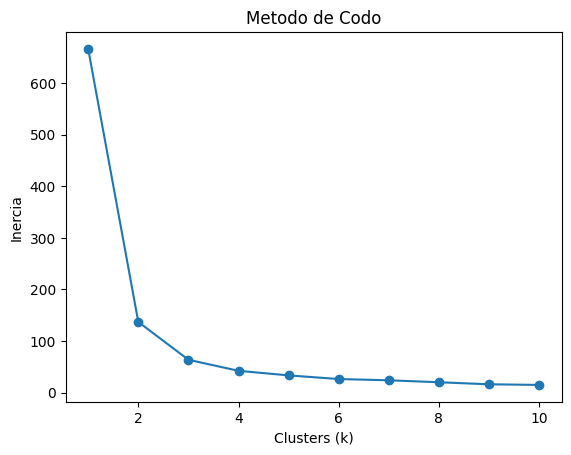

In [ ]:
#grafica de codo para kmeans

inercia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(iris_pca)
    inercia.append(kmeans.inertia_)

plt.plot(range(1, 11), inercia, marker='o')
plt.xlabel('Clusters (k)')
plt.ylabel('Inercia')
plt.title('Metodo de Codo')
plt.show()


In [ ]:
#Agrupamiento con KMEANS
kmeans = KMeans(n_clusters=3).fit(iris_pca)

In [ ]:
#Agregando las labels al dataset
iris_df = pd.DataFrame(iris_pca, columns=['PC1', 'PC2'])
iris_df['cluster'] = kmeans.labels_

iris_df

,PC1,PC2,cluster
0,-2.684126,0.319397,1
1,-2.714142,-0.177001,1
2,-2.888991,-0.144949,1
3,-2.745343,-0.318299,1
4,-2.728717,0.326755,1
...,...,...,...
145,1.944110,0.187532,0
146,1.527167,-0.375317,2
147,1.764346,0.078859,0
148,1.900942,0.116628,0


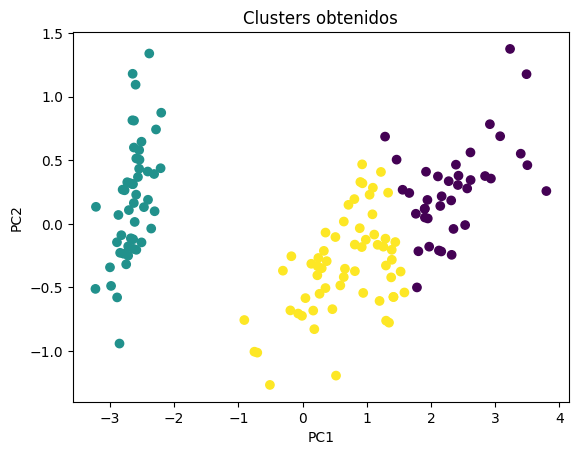

In [24]:
#Grafico de clusters obtenidos
plt.scatter(iris_df['PC1'], iris_df['PC2'], c=iris_df['cluster'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Clusters obtenidos')
plt.show()